In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc

import matplotlib.pyplot as plt
import math

In [4]:
# importing the features normalised and dropping all the non relevant columns to have a clean start
df = pd.read_csv("../data/interim/norm_features.csv")
df = df.drop(["seborrheic_keratosis", "Perimeter", "Area", "image_id", "Red", "Green", "Blue"], axis=1)

df.head()

,melanoma,Norm_Compactness,Norm_Asymmetry,Norm_Average Color
0,0.0,0.476510,0.383144,0.576044
1,0.0,0.397999,0.313298,0.350968
2,0.0,0.401858,0.183044,0.737918
3,0.0,0.319373,0.185313,0.648577
4,0.0,0.369017,0.519001,0.575675


In [31]:
# Split the data before feature selection
from sklearn.model_selection import train_test_split

#copying the dataframe. it should be with .copy() but it works like this too
df2 = df.copy()


# Some noisy features
noise = np.random.RandomState(42).uniform(0, 0.1, size=(df2.shape[0], 20))

# Add the noisy data to the informative features
# this is not something that makes sense to me. we add the noise to then ignore it in the next cell
X = np.hstack((df2[['Norm_Compactness', 'Norm_Asymmetry', "Norm_Average Color"]], noise))
y = df2['melanoma']

# Split dataset to select feature and evaluate the classifier
# the splitting is done by splitting the data into data to be used for training and validation (development of the model --> dev), and data to be used for testing. 
X_dev, X_test, y_dev, y_test = train_test_split(
        X, y, stratify=y, random_state=0)

# the development data is split into training and validation.
X_train, X_val, y_train, y_val = train_test_split(
        X_dev, y_dev, stratify=y_dev)

In [80]:
# Train a classifier
X_train = X_train[:,0:3] # Take only wanted features
roc_dict = {}
knn_list = [None]

neigh = int(math.sqrt(len(X_train2)))
neigh
# the range is to the neigh, as some sources suggest to use the square root of the number of datapoints, and it does seem as a fair estimation to decrease error
for i in range(1, neigh+1):
    #train the model with different values of the neighbors
    knn1 = KNeighborsClassifier(n_neighbors=i) 
    knn1trained = knn1.fit(X_train, y_train)
    
    #Select the same features as before
    X_val = X_val[:, 0:3]
    y_val_knn1 = knn1trained.predict(X_val)
    
    #adding the accuracy value to the dictionary to assess which is the best
    # can be calculated with another calculation, but it would be time consuming to do both to show they are identical
    roc_test = roc_auc_score(y_val, y_val_knn1)
    roc_dict[i] = roc_test
    knn_list.append(knn1trained)


# getting all the values with the highest accuracy score
max_keys = [key for key, value in roc_dict.items() if value == max(roc_dict.values())]

# we use the biggest of the neighbors values as the neighbor to use for the classification, as a lower value is not recomended 
print(roc_dict[max_keys[-1]])

y_val_knn1 = knn_list[max_keys[-1]].predict(X_val)
print(roc_auc_score(y_val, y_val_knn1))

y_val_knn1

0.659090909090909
0.659090909090909


array([0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.])

In [37]:
# Train a classifier
X_train = X_train[:,0:3] # Take only wanted features
roc_dict = {}


neigh = int(math.sqrt(len(X_train2)))
neigh
# the range is to the neigh, as some sources suggest to use the square root of the number of datapoints, and it does seem as a fair estimation to decrease error
for i in range(1, neigh+1):
    #train the model with different values of the neighbors
    tree1 = DecisionTreeClassifier() 
    tree1trained = tree1.fit(X_train, y_train)
    
    #Select the same features as before
    X_val = X_val[:, 0:3]
    y_val_tree1 = tree1trained.predict(X_val)
    
    #adding the accuracy value to the dictionary to assess which is the best
    # can be calculated with another calculation, but it would be time consuming to do both to show they are identical
    roc_test = roc_auc_score(y_val, y_val_tree1)
    roc_dict[i] = roc_test


# getting all the values with the highest accuracy score
max_keys = [key for key, value in roc_dict.items() if value == max(roc_dict.values())]

# we use the biggest of the neighbors values as the neighbor to use for the classification, as a lower value is not recomended 
print(roc_dict[max_keys[-1]])
print(roc_dict)

0.6742424242424243
{1: 0.6742424242424243, 2: 0.590909090909091, 3: 0.5681818181818182, 4: 0.5681818181818182, 5: 0.590909090909091, 6: 0.6742424242424243, 7: 0.6742424242424243, 8: 0.6742424242424243, 9: 0.5681818181818182}


In [44]:
# Train a classifier
X_train = X_train[:,0:3] # Take only wanted features
roc_dict = {}


neigh = int(math.sqrt(len(X_train2)))
neigh
# the range is to the neigh, as some sources suggest to use the square root of the number of datapoints, and it does seem as a fair estimation to decrease error
for i in range(1, neigh+1):
    #train the model with different values of the neighbors
    svc1 = SVC() 
    svc1trained = svc1.fit(X_train, y_train)
    
    #Select the same features as before
    X_val = X_val[:, 0:3]
    y_val_svc1 = svc1trained.predict(X_val)
    
    #adding the accuracy value to the dictionary to assess which is the best
    # can be calculated with another calculation, but it would be time consuming to do both to show they are identical
    roc_test = roc_auc_score(y_val, y_val_svc1)
    roc_dict[i] = roc_test


# getting all the values with the highest accuracy score
max_keys = [key for key, value in roc_dict.items() if value == max(roc_dict.values())]

# we use the biggest of the neighbors values as the neighbor to use for the classification, as a lower value is not recomended 
print(roc_dict[max_keys[-1]])
print(roc_dict)

0.5
{1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 0.5, 9: 0.5}


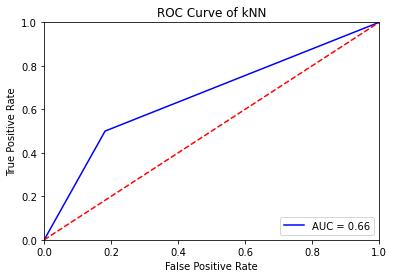

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [55]:
y_scores = knn1.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()
print(y_scores)